In [1]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook`pip  for interactive figures
# plt.style.use('ggplot')
import sklearn
import tigramite
from tigramite.independence_tests import ParCorr,CMIsymb
from tigramite import plotting as tp

C:\Users\rideo\Anaconda3\lib\site-packages\tigramite-4.2.2.1-py3.8-win-amd64.egg\tigramite\independence_tests\gpdc_torch.py:18: UserWarning: No module named 'gpytorch'
  warnings.warn(str(e))


In [2]:
import rpy2
import rpy2.robjects as robjects
from tigramite.pcmci import PCMCI
import tigramite.data_processing as pp
import pandas as pd

In [3]:
## Load the data - Using the discretized CSV tables instead of raw data
import_data = pd.read_csv('Exported from python discretized/Discretized_S3.csv')

In [4]:
import_data = import_data.astype('float64')

In [5]:
import_data = import_data.drop(import_data.columns[[0]],axis=1) #Dropping an unncesesary serial number column

In [6]:
var_names = ['PEEGd', 'PEEGt', 'PEEGa', 'PEEGs', 'PEEGb', 'PECG_HF', 'PECG_LF', 'BR',
       'BPM', 'AUC_Resp', 'HEI', 'LEI', 'AEI', 'SS']

In [7]:
dataframe = pp.DataFrame(data = import_data.values, var_names = var_names)

In [8]:
cond_ind_test = ParCorr()
pcmci = PCMCI(dataframe,cond_ind_test,verbosity=0)

In [9]:
all_parents = pcmci.run_pc_stable(tau_max=2, pc_alpha=0.2)

In [10]:
results = pcmci.run_pcmci(tau_max=4, pc_alpha=None)

In [11]:
pcmci.print_significant_links(p_matrix=results['p_matrix'],
                                     val_matrix=results['val_matrix'],
                                     alpha_level=0.05) ## Significant parents at alpha = 0.05:


## Significant links at alpha = 0.05:

    Variable PEEGd has 10 link(s):
        (PEEGd -1): pval = 0.00000 | val =  0.394
        (PEEGt  0): pval = 0.00000 | val =  0.350
        (PEEGb  0): pval = 0.00000 | val =  0.265
        (PEEGs  0): pval = 0.00001 | val =  0.242
        (PEEGa  0): pval = 0.00230 | val =  0.168
        (BPM -4): pval = 0.01456 | val =  0.134
        (AUC_Resp -1): pval = 0.02000 | val = -0.126
        (PEEGs -2): pval = 0.04148 | val =  0.113
        (AUC_Resp -2): pval = 0.04210 | val = -0.111
        (PEEGt -2): pval = 0.04769 | val =  0.109

    Variable PEEGt has 18 link(s):
        (PEEGs  0): pval = 0.00000 | val =  0.781
        (PEEGb  0): pval = 0.00000 | val =  0.769
        (PEEGa  0): pval = 0.00000 | val =  0.765
        (PEEGd  0): pval = 0.00000 | val =  0.350
        (PEEGt -1): pval = 0.00000 | val =  0.347
        (PECG_LF  0): pval = 0.00000 | val = -0.305
        (PECG_HF  0): pval = 0.00000 | val = -0.304
        (BPM  0): pval = 0.0000

In [12]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable PEEGd has 5 link(s):
        (PEEGd -1): pval = 0.00000 | qval = 0.00000 | val =  0.394
        (PEEGt  0): pval = 0.00000 | qval = 0.00000 | val =  0.350
        (PEEGb  0): pval = 0.00000 | qval = 0.00000 | val =  0.265
        (PEEGs  0): pval = 0.00001 | qval = 0.00001 | val =  0.242
        (PEEGa  0): pval = 0.00230 | qval = 0.00230 | val =  0.168

    Variable PEEGt has 9 link(s):
        (PEEGs  0): pval = 0.00000 | qval = 0.00000 | val =  0.781
        (PEEGb  0): pval = 0.00000 | qval = 0.00000 | val =  0.769
        (PEEGa  0): pval = 0.00000 | qval = 0.00000 | val =  0.765
        (PEEGd  0): pval = 0.00000 | qval = 0.00000 | val =  0.350
        (PEEGt -1): pval = 0.00000 | qval = 0.00000 | val =  0.347
        (PECG_LF  0): pval = 0.00000 | qval = 0.00000 | val = -0.305
        (PECG_HF  0): pval = 0.00000 | qval = 0.00000 | val = -0.304
        (BPM  0): pval = 0.00000 | qval = 0.00000 | val = -0.265
        (BR  0): p

In [13]:
link_matrix = pcmci.return_significant_links(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

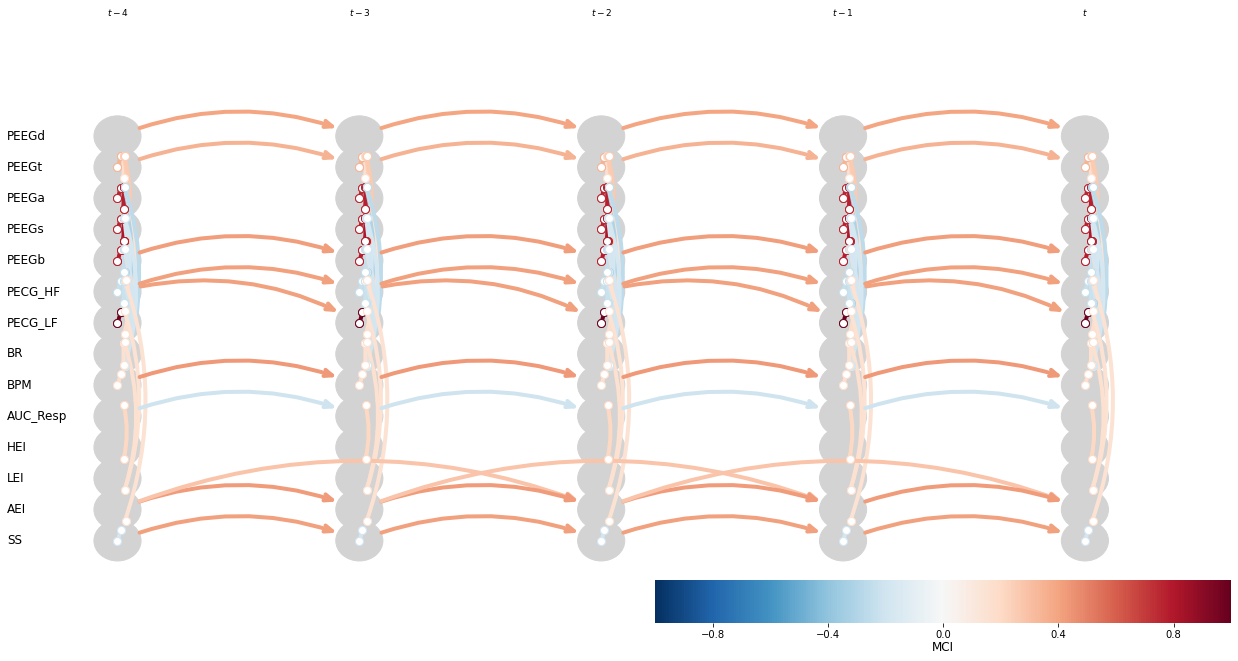

In [16]:
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='MCI',
    figsize = (20,10)
    ); plt.show()